# LSTM (MNIST)

In [1]:
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [2]:
!nvidia-smi -L
print(f'Tensorflow version: {tf.__version__}')

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)
Tensorflow version: 2.3.1


In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3435 - accuracy: 0.8877 - val_loss: 0.1227 - val_accuracy: 0.9622
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1028 - accuracy: 0.9693 - val_loss: 0.0916 - val_accuracy: 0.9711
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0733 - accuracy: 0.9786 - val_loss: 0.0594 - val_accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0563 - accuracy: 0.9827 - val_loss: 0.0478 - val_accuracy: 0.9851
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0455 - accuracy: 0.9862 - val_loss: 0.0482 - val_accuracy: 0.9853
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0369 - accuracy: 0.9891 - val_loss: 0.0517 - val_accuracy: 0.9851
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0323 - accuracy: 0.9904 - val_loss: 0.0436 - val_accuracy:

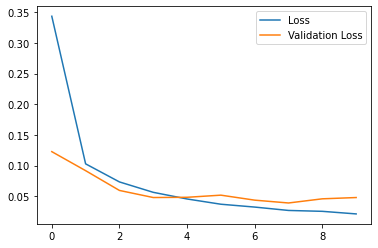

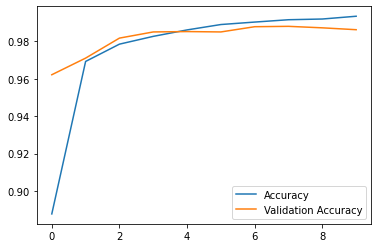

313/313 [==============================] - 1s 2ms/step - loss: 0.0478 - accuracy: 0.9863
Accuracy: 0.986299991607666


In [4]:
i = tf.keras.Input(shape=(28, 28))
x = tf.keras.layers.LSTM(128)(i)
x = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(i, x)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=10)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()

print(f'Accuracy: {model.evaluate(X_test, y_test)[1]}')

## Plot the confusion matrix

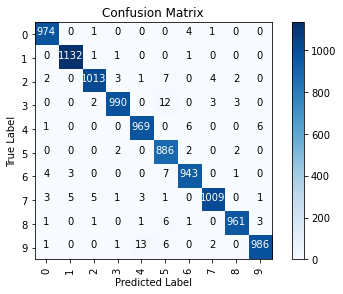

In [5]:
def plot_confusion_matrix(cm, labels):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    num_classes = len(labels)
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, labels, rotation=90)
    plt.yticks(tick_marks, labels)
    
    threshold = cm.max() / 2
    for i, j in itertools.product(range(num_classes), range(num_classes)):
        plt.text(j, i, cm[i, j],
                 ha='center',
                 color='white' if cm[i, j] > threshold else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

## Display a random misclassified image

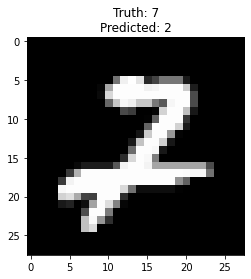

In [6]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title(f'Truth: {y_test[i]}\nPredicted: {p_test[i]}')
plt.show()